# Notebook 02: Sensor Distribution Analysis
## Epoch 003: Exploratory Data Analysis

This notebook analyzes the distribution of all 21 sensor measurements to understand their ranges, variability, and statistical properties.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from pathlib import Path

sys.path.insert(0, '/mnt/code/src')
from predictive_maintenance.data_utils import load_turbofan_data, calculate_rul

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')
%matplotlib inline

In [2]:
# Load data
DATA_PATH = Path('/mnt/data/Preventative-Maintainance-Example/epoch002-data-wrangling')
df = load_turbofan_data(DATA_PATH / 'fd001_train.parquet')
df = calculate_rul(df)

# Identify sensor columns
sensor_cols = [col for col in df.columns if col.startswith('sensor_')]
print(f'Analyzing {len(sensor_cols)} sensors')

Analyzing 21 sensors


## 1. Descriptive Statistics for All Sensors

In [3]:
# Calculate statistics
sensor_stats = df[sensor_cols].describe().T
sensor_stats['range'] = sensor_stats['max'] - sensor_stats['min']
sensor_stats['cv'] = (sensor_stats['std'] / sensor_stats['mean']) * 100  # Coefficient of variation

print('Sensor Statistics Summary:')
sensor_stats

Sensor Statistics Summary:


,count,mean,std,min,25%,50%,75%,max,range,cv
sensor_1,24453.0,557.735295,24.832794,484.574921,538.190767,557.735455,577.460462,626.669211,142.094290,4.452434
sensor_2,24453.0,690.093632,30.547816,599.769678,666.081693,690.212611,714.101674,776.585141,176.815463,4.426619
sensor_3,24453.0,1709.350940,75.526952,1492.414264,1649.424687,1709.248515,1768.639261,1913.729007,421.314743,4.418458
sensor_4,24453.0,1505.830358,66.571642,1313.629079,1453.368229,1505.854118,1558.408320,1704.797290,391.168211,4.420926
sensor_5,24453.0,15.720238,0.694769,13.583050,15.169988,15.715847,16.275416,17.725630,4.142580,4.419584
sensor_6,24453.0,23.237274,1.032307,20.117921,22.418079,23.236857,24.055003,26.265844,6.147923,4.442463
sensor_7,24453.0,596.125094,26.448336,517.466361,575.070089,596.218245,617.282400,675.764326,158.297965,4.436709
sensor_8,24453.0,2567.521049,114.294109,2232.561757,2476.919668,2568.083126,2657.824847,2906.613643,674.051886,4.451535
sensor_9,24453.0,9728.286016,431.972928,8342.142756,9386.096040,9729.262188,10071.315733,10958.692158,2616.549403,4.440381
sensor_10,24453.0,1.397899,0.062065,1.218840,1.348436,1.397945,1.447209,1.602921,0.384081,4.439894


## 2. Sensor Distributions (Part 1: Sensors 1-12)

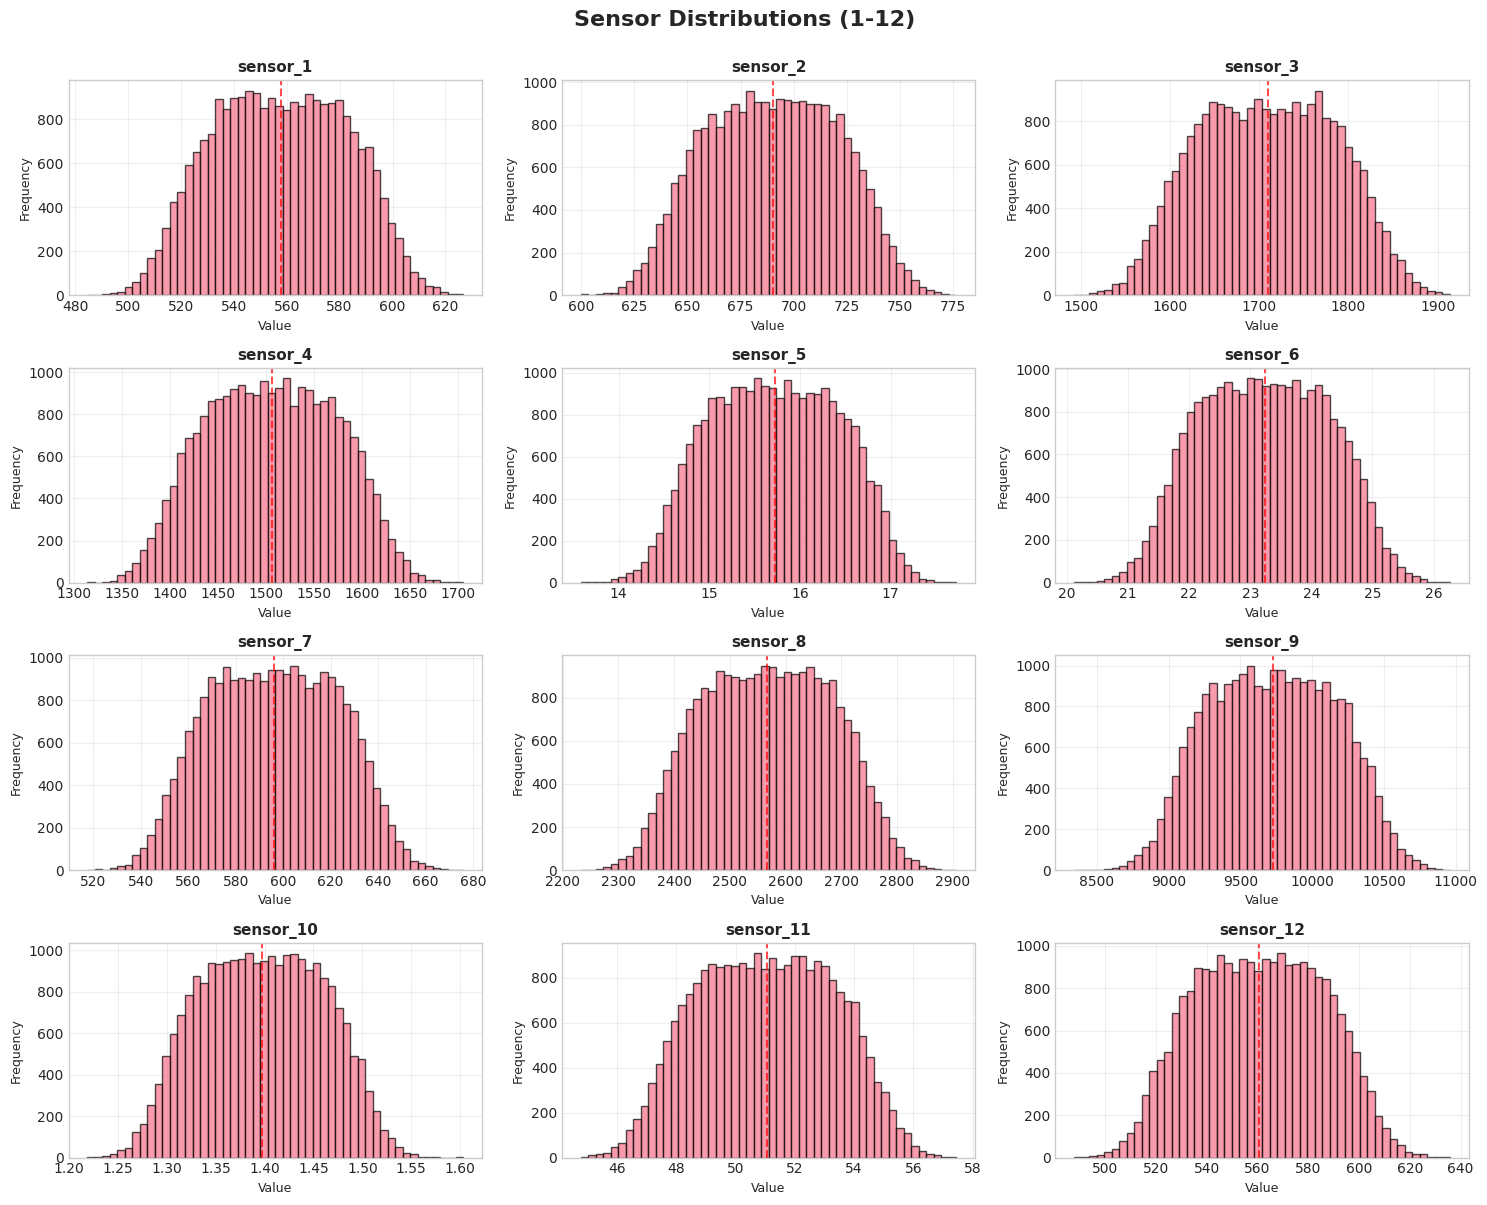

✓ Sensor distributions 1-12 plotted


In [4]:
# Plot distributions for sensors 1-12
fig, axes = plt.subplots(4, 3, figsize=(15, 12))
axes = axes.flatten()

for idx, sensor in enumerate(sensor_cols[:12]):
    axes[idx].hist(df[sensor].dropna(), bins=50, edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'{sensor}', fontsize=11, fontweight='bold')
    axes[idx].set_xlabel('Value', fontsize=9)
    axes[idx].set_ylabel('Frequency', fontsize=9)
    axes[idx].grid(True, alpha=0.3)
    
    # Add mean line
    mean_val = df[sensor].mean()
    axes[idx].axvline(mean_val, color='red', linestyle='--', linewidth=1.5, alpha=0.7)

plt.suptitle('Sensor Distributions (1-12)', fontsize=16, fontweight='bold', y=1.0)
plt.tight_layout()
plt.savefig('/mnt/artifacts/epoch003-exploratory-data-analysis/02_sensor_distributions_1-12.png', 
            dpi=150, bbox_inches='tight')
plt.show()

print('✓ Sensor distributions 1-12 plotted')

## 3. Sensor Distributions (Part 2: Sensors 13-21)

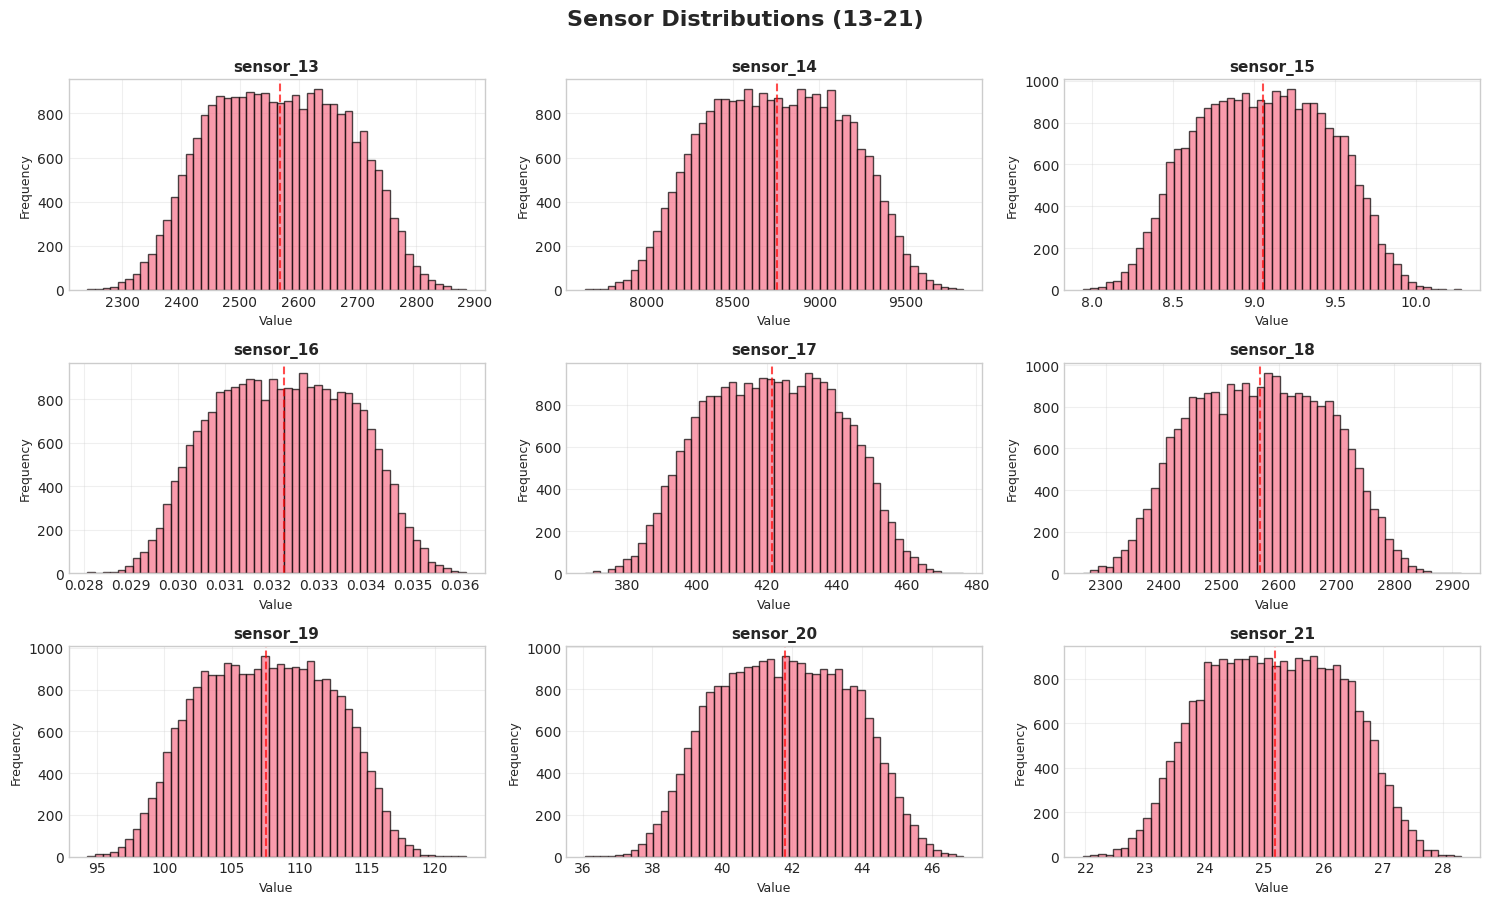

✓ Sensor distributions 13-21 plotted


In [5]:
# Plot distributions for sensors 13-21
fig, axes = plt.subplots(3, 3, figsize=(15, 9))
axes = axes.flatten()

for idx, sensor in enumerate(sensor_cols[12:21]):
    axes[idx].hist(df[sensor].dropna(), bins=50, edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'{sensor}', fontsize=11, fontweight='bold')
    axes[idx].set_xlabel('Value', fontsize=9)
    axes[idx].set_ylabel('Frequency', fontsize=9)
    axes[idx].grid(True, alpha=0.3)
    
    # Add mean line
    mean_val = df[sensor].mean()
    axes[idx].axvline(mean_val, color='red', linestyle='--', linewidth=1.5, alpha=0.7)

plt.suptitle('Sensor Distributions (13-21)', fontsize=16, fontweight='bold', y=1.0)
plt.tight_layout()
plt.savefig('/mnt/artifacts/epoch003-exploratory-data-analysis/02_sensor_distributions_13-21.png', 
            dpi=150, bbox_inches='tight')
plt.show()

print('✓ Sensor distributions 13-21 plotted')

## 4. Distribution Shapes Analysis

In [6]:
# Calculate skewness and kurtosis
from scipy import stats

dist_metrics = pd.DataFrame({
    'skewness': df[sensor_cols].skew(),
    'kurtosis': df[sensor_cols].kurtosis()
})

dist_metrics['shape'] = dist_metrics['skewness'].apply(
    lambda x: 'Right-skewed' if x > 0.5 else ('Left-skewed' if x < -0.5 else 'Symmetric')
)

print('Distribution Shape Analysis:')
dist_metrics

Distribution Shape Analysis:


,skewness,kurtosis,shape
sensor_1,-0.002285,-0.818636,Symmetric
sensor_2,-0.005444,-0.795509,Symmetric
sensor_3,-0.002487,-0.808285,Symmetric
sensor_4,0.002857,-0.816071,Symmetric
sensor_5,-0.011767,-0.835912,Symmetric
sensor_6,0.008152,-0.795660,Symmetric
sensor_7,-0.001009,-0.823460,Symmetric
sensor_8,-0.005412,-0.801889,Symmetric
sensor_9,0.011155,-0.814188,Symmetric
sensor_10,0.003877,-0.819246,Symmetric


## 5. Sensor Variability Comparison

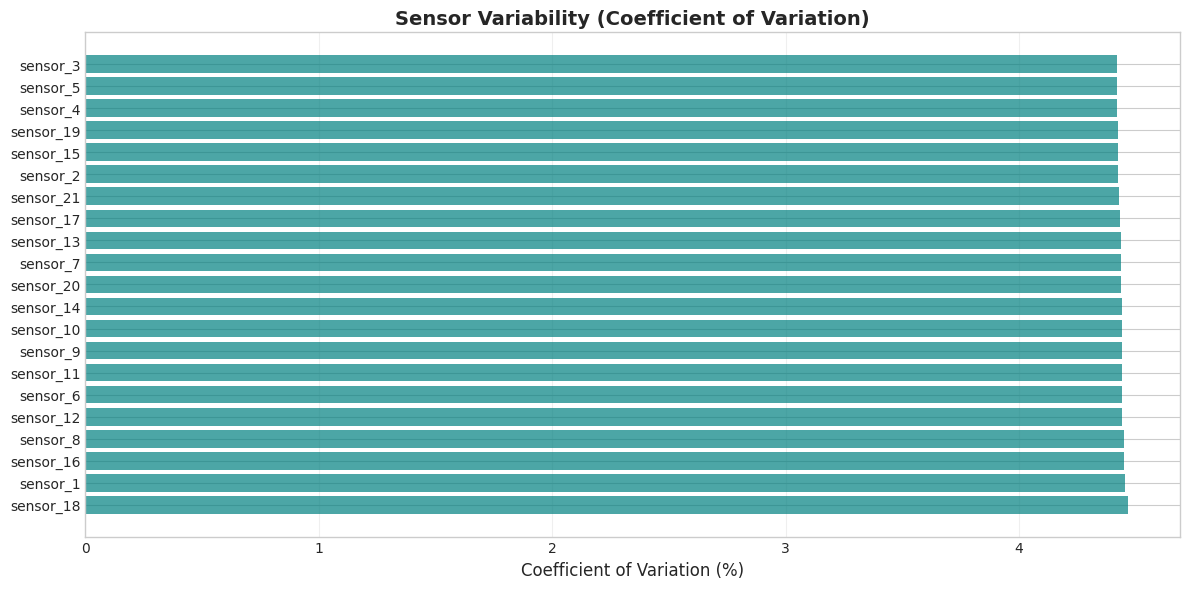

✓ Sensor variability plot created


In [7]:
# Coefficient of Variation comparison
cv_data = sensor_stats['cv'].sort_values(ascending=False)

plt.figure(figsize=(12, 6))
plt.barh(range(len(cv_data)), cv_data.values, color='teal', alpha=0.7)
plt.yticks(range(len(cv_data)), cv_data.index)
plt.xlabel('Coefficient of Variation (%)', fontsize=12)
plt.title('Sensor Variability (Coefficient of Variation)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.savefig('/mnt/artifacts/epoch003-exploratory-data-analysis/02_sensor_variability.png', 
            dpi=150, bbox_inches='tight')
plt.show()

print('✓ Sensor variability plot created')

## 6. Box Plots for Selected Sensors

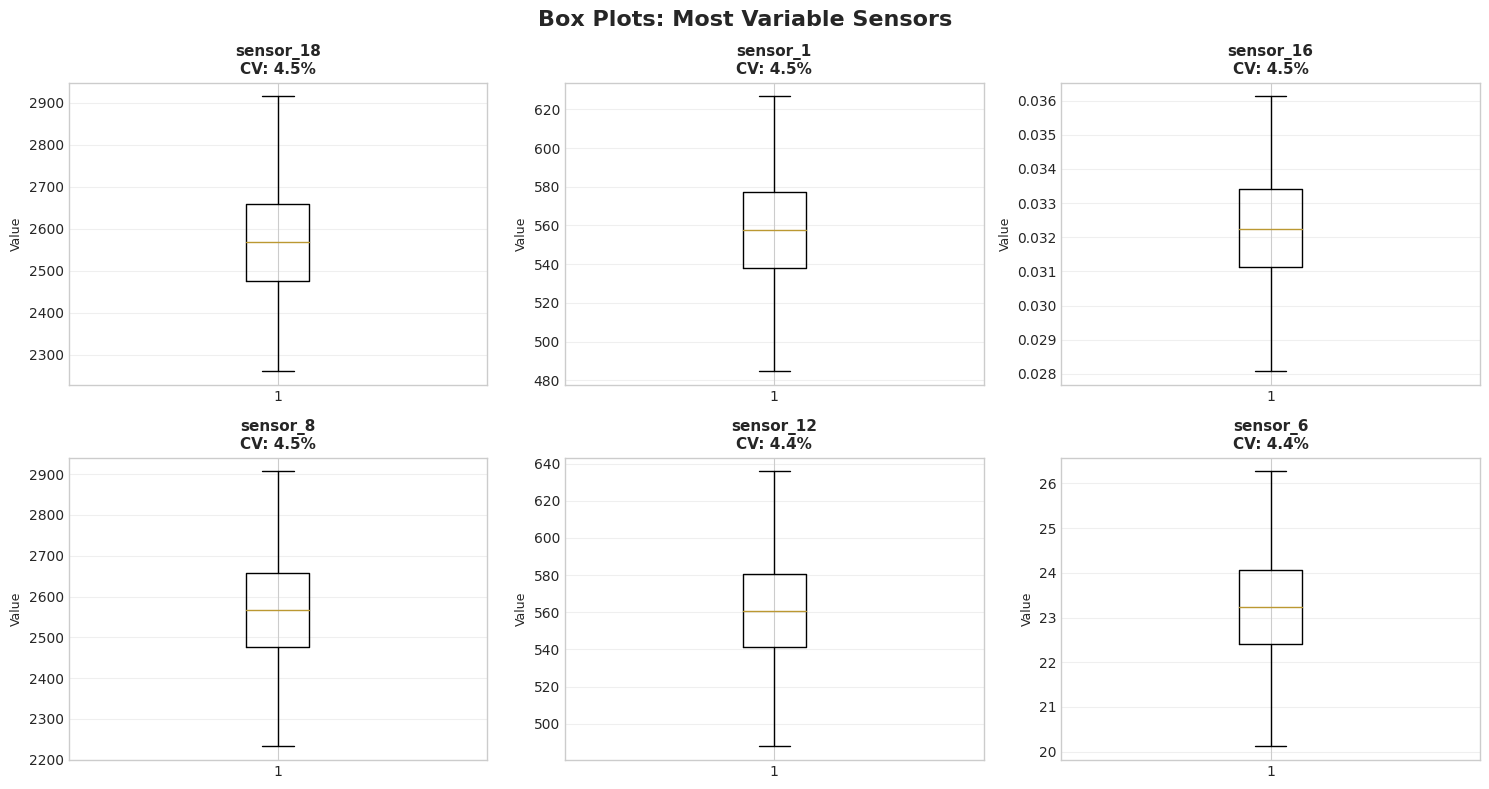

✓ Sensor box plots created


In [8]:
# Box plots for sensors with highest variability
top_variable_sensors = cv_data.head(6).index.tolist()

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for idx, sensor in enumerate(top_variable_sensors):
    axes[idx].boxplot(df[sensor].dropna(), vert=True)
    axes[idx].set_title(f'{sensor}\nCV: {cv_data[sensor]:.1f}%', fontsize=11, fontweight='bold')
    axes[idx].set_ylabel('Value', fontsize=9)
    axes[idx].grid(True, alpha=0.3, axis='y')

plt.suptitle('Box Plots: Most Variable Sensors', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('/mnt/artifacts/epoch003-exploratory-data-analysis/02_sensor_boxplots.png', 
            dpi=150, bbox_inches='tight')
plt.show()

print('✓ Sensor box plots created')

## 7. Summary

### Key Observations:

1. **Sensor Ranges:** All sensors show different measurement scales and ranges
2. **Variability:** Sensors exhibit varying levels of variability (coefficient of variation)
3. **Distribution Shapes:** Most sensors show relatively symmetric distributions
4. **Outliers:** Some sensors show potential outliers (visible in box plots)

### Implications for Modeling:
- Feature scaling will be important due to different sensor ranges
- High-variability sensors may be more informative for failure prediction
- Outlier handling may be needed for some sensors